In [1]:
# Import the MSCDB api
import mascdb.api
from mascdb.api import MASC_DB

# Import other libraries
from IPython.display import display
import numpy as np
import pandas as pd
import pyarrow
from sklearn.model_selection import *
from sklearn import *

# Import files
from helpers import *

# Autoreload
%load_ext autoreload
%autoreload 2

In [2]:
masc_path = 'Data/MASCDB'
mascdb_features = MASC_DB(masc_path)

MASCDB data structure:
-------------------------------------------------------------------------
- mascdb.da:
<xarray.DataArray 'MASC Images' (flake_id: 851697, y: 1024, x: 1024, cam_id: 3)>
dask.array<open_dataset-73e96566450d9ff6dfe97bacda87d885data, shape=(851697, 1024, 1024, 3), dtype=uint8, chunksize=(256, 1024, 1024, 3), chunktype=numpy.ndarray>
Coordinates:
  * cam_id    (cam_id) int64 0 1 2
  * flake_id  (flake_id) <U32 '2015.02.10_11.55.10_flake_4' ... '2021.03.17_1...
Dimensions without coordinates: y, x
-------------------------------------------------------------------------
- mascdb.cam0, mascdb.cam1, mascdb.cam2:
                                               datetime  \
flake_id                                                  
2015.02.10_11.55.10_flake_4  2015-02-10 11:55:10.530427   
2015.02.10_11.55.15_flake_9  2015-02-10 11:55:15.132434   
2015.02.10_11.55.16_flake_10 2015-02-10 11:55:16.661233   
2015.02.10_11.55.17_flake_11 2015-02-10 11:55:17.410032   
2015.02.10_

<AxesSubplot:xlabel='Dmax'>

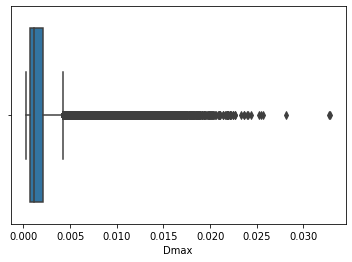

In [3]:
print(mascdb_features)
len(mascdb_features)
mascdb_features.cam0.sns.boxplot(x = "Dmax")

**Remark:** Par exemple, on peut avoir 1100 flocons qui sont classifiés pour la cam 2, mais seulement 815 sont dans le parquet file. La raison veint du fait que la classification a été faite sur les images et donc les données numériques n'ont pas été nécéssairement produites poru toutes les photos.

In [4]:
# Get the columns to delelte for our experiences
black_list_words = ['roi', 'riming', 'melting', 'snowflake', 'hl']
cols_to_delete = list(filter(lambda cols: any(word in cols for word in black_list_words), mascdb_features.cam0.columns))
cols_to_delete.extend(['datetime', 'pix_size', 'flake_number_tmp', 'event_id'])

In [8]:
mascdb_features_filt = mascdb_features.drop_cam_columns(cols_to_delete)
display(mascdb_features_filt.cam0)

,flake_id,cam_id,area,perim,Dmean,Dmax,eq_radius,area_porous,area_porous_r,ell_fit_A,...,wavs,complexity,har_energy,har_contrast,har_corr,har_hom,quality_xhi,Dmax_ori,Dmax_90,D90_r
flake_id,,,,,,,,,,,,,,,,,,,,,
2015.02.10_11.55.10_flake_4,2015.02.10_11.55.10_flake_4,1,8.880000e-07,0.00375,0.00129,0.00143,0.00053,8.880000e-07,1.000,0.00074,...,2.2,1.12,0.001695,102.7,0.93,0.241,8.1,-20.6,0.00104,0.70
2015.02.10_11.55.15_flake_9,2015.02.10_11.55.15_flake_9,1,1.830000e-07,0.00147,0.00049,0.00052,0.00024,1.830000e-07,1.000,0.00027,...,3.5,0.97,0.005297,45.0,0.72,0.278,9.4,39.8,0.00050,0.88
2015.02.10_11.55.16_flake_10,2015.02.10_11.55.16_flake_10,1,4.959000e-06,0.01092,0.00290,0.00368,0.00126,4.944000e-06,0.997,0.00187,...,6.9,1.38,0.000415,938.2,0.83,0.156,10.7,-6.8,0.00211,0.57
2015.02.10_11.55.17_flake_11,2015.02.10_11.55.17_flake_11,1,2.200000e-07,0.00161,0.00055,0.00059,0.00026,2.200000e-07,1.000,0.00030,...,4.0,0.97,0.003909,492.2,0.86,0.184,9.0,76.8,0.00050,0.83
2015.02.10_11.55.20_flake_14,2015.02.10_11.55.20_flake_14,1,5.640000e-07,0.00288,0.00095,0.00100,0.00042,5.640000e-07,1.000,0.00050,...,10.9,1.08,0.002114,1861.3,0.71,0.169,10.2,-13.6,0.00100,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021.03.11_17.05.09_flake_24,2021.03.11_17.05.09_flake_24,1,3.650000e-07,0.00231,0.00079,0.00099,0.00034,3.650000e-07,1.000,0.00052,...,2.8,1.08,0.006565,10.9,0.89,0.400,8.1,78.3,0.00054,0.52
2021.03.12_02.12.13_flake_45,2021.03.12_02.12.13_flake_45,1,2.477000e-06,0.01002,0.00206,0.00213,0.00089,2.458000e-06,0.992,0.00108,...,3.2,1.80,0.005846,27.6,0.80,0.384,9.6,8.1,0.00198,0.92
2021.03.13_16.16.35_flake_52,2021.03.13_16.16.35_flake_52,1,2.415500e-05,0.04348,0.00745,0.00842,0.00277,2.414300e-05,0.999,0.00379,...,1.6,2.50,0.000624,43.1,0.97,0.303,9.9,-83.8,0.00690,0.81


**Remark:** Normal d'avoir deux fois la colonne `flake_id` dans notre dataframe. 

In [6]:
# Get train set
mascdb_classes = MASCDB_classes("Data")
cam0_train_set = mascdb_classes.get_features_cam("hydro", 0, mascdb_features.cam0)
display(mascdb_classes.hydro_cam0.head(10))
for i in range(1, 7):
    display(mascdb_classes.hydro_cam0[mascdb_classes.hydro_cam0.class_id == i].shape)

,flake_id,class_id
0,2015.02.22_02.13.07_flake_8565,1.0
1,2015.02.22_02.16.21_flake_8708,1.0
2,2015.02.22_02.20.35_flake_8884,1.0
3,2015.02.22_02.21.00_flake_8901,1.0
4,2015.02.22_02.21.12_flake_8911,3.0
5,2015.02.22_02.27.48_flake_9199,1.0
6,2015.02.22_02.31.56_flake_9388,1.0
8,2015.02.22_02.43.19_flake_9857,1.0
9,2015.02.22_02.47.56_flake_10039,1.0
10,2015.02.22_02.48.28_flake_10059,1.0


(251, 2)

(146, 2)

(148, 2)

(167, 2)

(193, 2)

(38, 2)

In [18]:
#Standardization of the data
classified_data = mascdb_classes.get_classified_data("hydro", mascdb_features_filt)
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
classified_data_ = pt.fit(classified_data.drop(['flake_id'], axis=1))
classified_data_ = pt.transform(classified_data.drop(['flake_id'], axis=1))
display(classified_data_)

array([[-1.55371688, -1.09292247, -1.33697345, ...,  1.00353654,
        -1.41575889, -0.24431456],
       [-1.55371688, -1.04790266, -1.224509  , ..., -0.82479526,
        -1.11265295,  1.44236003],
       [-1.55371688, -1.01193096, -1.11383446, ...,  1.62725484,
        -1.14630055, -0.51702499],
       ...,
       [ 1.09766792, -0.8773919 , -0.96833246, ..., -1.19163576,
        -0.89673446, -0.1861801 ],
       [ 1.09766792, -0.50413504, -0.46404407, ..., -1.05440107,
        -0.21206854,  0.5395248 ],
       [ 1.09766792, -0.50075714, -0.40114606, ..., -0.58696309,
        -0.38079562, -0.41145898]])

In [19]:
classified_data[classified_data.columns.difference(['flake_id'])]  = classified_data_

In [20]:
classified_data

,flake_id,cam_id,area,perim,Dmean,Dmax,eq_radius,area_porous,area_porous_r,ell_fit_A,...,wavs,complexity,har_energy,har_contrast,har_corr,har_hom,quality_xhi,Dmax_ori,Dmax_90,D90_r
flake_id,,,,,,,,,,,,,,,,,,,,,
2015.02.22_05.00.33_flake_15596,2015.02.22_05.00.33_flake_15596,-1.084046,-1.542898,-0.461292,-1.636032,-1.092922,-0.354472,-1.099751,0.631485,-1.396522,...,-0.244315,-0.105760,-1.265353,0.944383,-1.304748,0.073159,-0.749753,-1.580050,-1.336973,-1.553717
2015.02.22_05.22.11_flake_16279,2015.02.22_05.22.11_flake_16279,-1.040975,-1.340724,-0.461292,-1.489835,-1.047903,1.544744,-1.053720,0.631485,-1.299496,...,1.442360,0.638941,-1.061677,0.944383,-2.188388,-1.282435,-0.749753,-1.404108,-1.224509,-1.553717
2015.02.22_05.29.59_flake_16412,2015.02.22_05.29.59_flake_16412,-0.993158,-1.230126,-0.931587,-1.214071,-1.011931,-0.495023,-1.016951,0.631485,-1.205082,...,-0.517025,-0.340238,-0.726488,0.885738,0.301171,-0.651424,0.946713,-1.236414,-1.113834,-1.553717
2015.02.22_05.30.19_flake_16418,2015.02.22_05.30.19_flake_16418,-1.008795,-1.230126,0.259362,-1.339421,-1.014343,-0.205901,-1.019417,0.631485,-1.174178,...,0.845844,-0.202036,-0.755099,0.544877,-0.324296,-0.651424,-0.749753,-1.291420,-1.119882,-1.553717
2015.02.22_05.43.54_flake_16575,2015.02.22_05.43.54_flake_16575,-1.042997,-1.397350,-0.533712,-1.310088,-1.061751,-1.018611,-1.067878,0.631485,-1.331544,...,-1.099221,-0.812379,-0.509646,0.712962,-0.324296,-1.282435,-0.749753,-1.369922,-1.183065,-1.553717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017.01.13_21.28.14_flake_25596,2017.01.13_21.28.14_flake_25596,-0.780873,-0.635240,0.450062,-0.864244,-0.753319,0.005199,-0.752881,0.631485,-0.908339,...,0.466653,0.342677,-0.903574,0.600387,1.403673,-0.651424,-0.749753,-0.779036,-0.818692,1.097668
2017.01.13_21.33.01_flake_25718,2017.01.13_21.33.01_flake_25718,-0.803256,-0.680615,0.101848,-0.813731,-0.768131,0.668195,-0.767993,0.631485,-0.560798,...,-0.066168,0.116683,-1.230286,1.123503,0.066862,1.017331,-0.749753,-0.779036,-0.900033,1.097668
2017.01.13_21.35.33_flake_25764,2017.01.13_21.35.33_flake_25764,-0.892241,-0.869466,-1.202618,-1.020969,-0.877392,0.291027,-0.879511,0.631485,-0.560798,...,-0.186180,-0.021059,-0.997226,0.770030,0.814443,-0.431127,-0.749753,-0.984300,-0.968332,1.097668


In [ ]:
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(input_, )